In [1]:
import pickle
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Broad

In [3]:
dir_in_Lx = '../out/20.0909 Lx/L200only_reg_rf_boruta_all/'

y_compr_tr = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_tr.pkl'), 'rb'))
y_compr_te = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_te.pkl'), 'rb'))

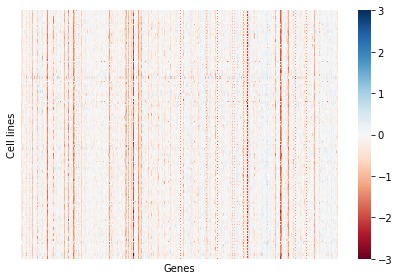

In [16]:
plt.figure()
ax = sns.heatmap(y_compr_te['actual'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

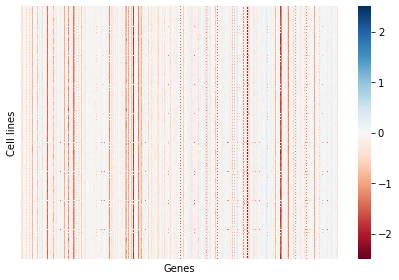

In [21]:
plt.figure()
ax = sns.heatmap(y_compr_te['predicted'], yticklabels=False, xticklabels=False, vmin=-2.5, vmax=2.5, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

### Sanger

In [7]:
dir_in_Lx = '../out/20.0926 feat Sanger/reg_rf_boruta_gs16/'

y_compr_ext = pickle.load(open(os.path.join(dir_in_Lx, 'anlyz', 'y_compr_ext.pkl'), 'rb'))

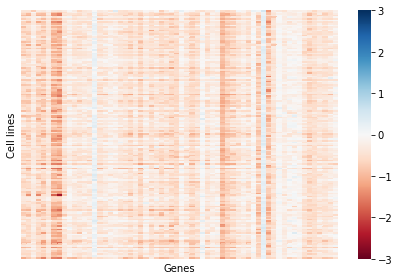

In [8]:
plt.figure()
ax = sns.heatmap(y_compr_ext['actual'], yticklabels=False, xticklabels=False, vmin=-3, vmax=3, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()

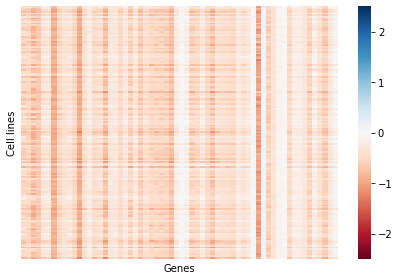

In [11]:
plt.figure()
ax = sns.heatmap(y_compr_ext['predicted'], yticklabels=False, xticklabels=False, vmin=-2.5, vmax=2.5, cmap='RdBu')
ax.set(xlabel='Genes', ylabel='Cell lines')
plt.tight_layout()